Hit rate: 0.29
False alarm rate: 0.07
Misses: 0.71
Correct rejections: 0.94


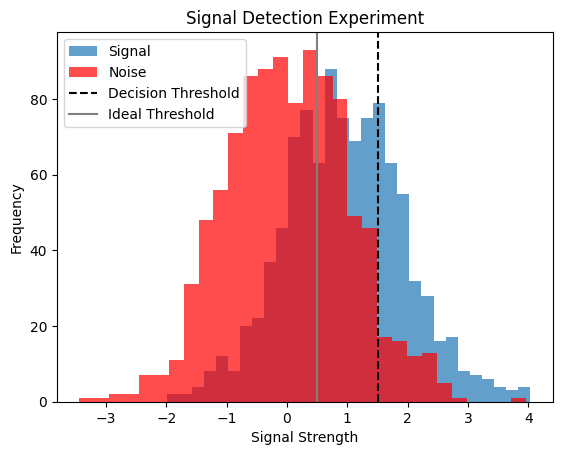

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# We start by making a function to generate the data
def response_generate(signal, noise, threshold):
    # get the length of the two vectors (we assume they are the same)
    num_trials = len(signal)

    # hits are when the signal is presented and it is above the observer's threshold
    hits = np.sum((signal>threshold))/num_trials

    # false alarms are when the noise is presented and it is above the observer's threshold
    false_alarms = np.sum((noise > threshold))/num_trials

    # misses are when the signal is presented and it is below the observer's threshold
    misses = np.sum((signal<threshold))/num_trials

    # correct_rejections are when the noise is presented and it is below the observer's threshold
    correct_rejections = np.sum((noise < threshold))/num_trials

    # Everything is returned as a rate
    return hits, false_alarms, misses, correct_rejections

# Parameters for simulating the data (signal + noise)
num_trials = 1000
signal_strength = 1.0
noise_std = 1.0
noise = np.random.normal(0, noise_std, num_trials)
signal = np.random.normal(signal_strength, noise_std, num_trials)

# Threshold for decision-making
threshold = 1.5

# Ideal observer separation
ideal_separation = signal_strength/2

# Compute hits and false alarms using the function
hits, false_alarms, misses, correct_rejections = response_generate(signal, noise, threshold)

# What was the performance?
print(f"Hit rate: {hits:.2f}")
print(f"False alarm rate: {false_alarms:.2f}")
print(f"Misses: {misses:.2f}")
print(f"Correct rejections: {correct_rejections:.2f}")


# Plot the signal distribution
plt.hist(signal, bins=30, alpha=0.7, label="Signal")
plt.hist(noise, bins=30, alpha=0.7, color='red', label="Noise")
plt.axvline(threshold, color="black", linestyle="--", label="Decision Threshold")
plt.axvline(ideal_separation, color="gray", linestyle="-", label="Ideal Threshold")
plt.xlabel("Signal Strength")
plt.ylabel("Frequency")
plt.title("Signal Detection Experiment")
plt.legend()
plt.show()


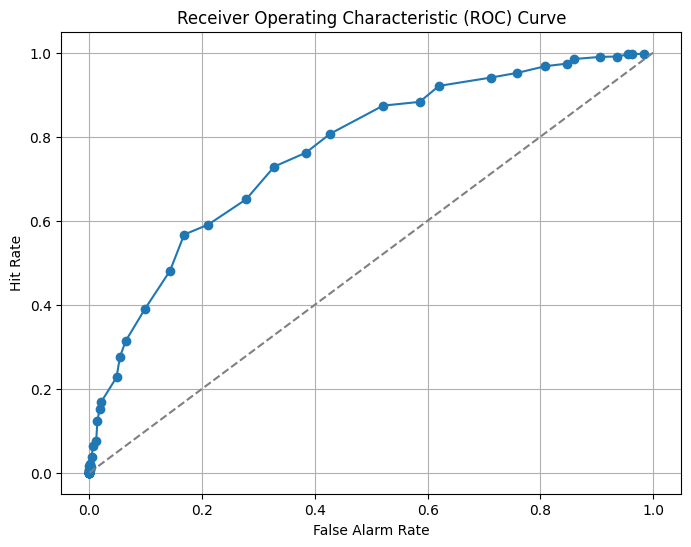

In [26]:
# Vary the threshold to create an ROC curve
num_trials = 1000
noise_std = 1.0
signal_strength = 1.0
thresholds = np.linspace(-2, 6, num=50)  # Vary threshold used
hit_rates = []
false_alarm_rates = []
correct_rejection_rates = []

for threshold in thresholds:
    # Simulate data (signal + noise)
    noise = np.random.normal(0, noise_std, num_trials)
    signal = np.random.normal(signal_strength, noise_std, num_trials)

    # Compute hits and false alarms using the function
    hits, false_alarms, misses, correct_rejections = response_generate(signal, noise, threshold)

    # Compute hit rate and false alarm rate
    hit_rates.append(hits)
    false_alarm_rates.append(false_alarms)
    correct_rejection_rates.append(correct_rejections)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(false_alarm_rates, hit_rates, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Alarm Rate")
plt.ylabel("Hit Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.grid(True)
plt.show()


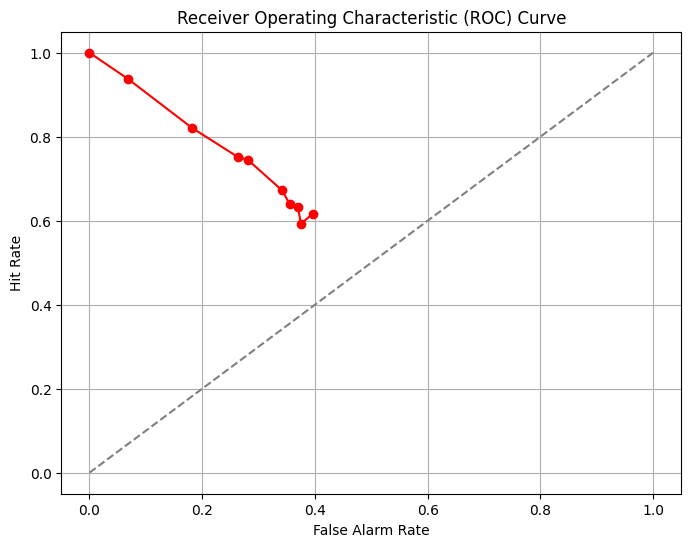

In [27]:
# Vary the noise variance to create an ROC curve
num_trials = 1000
threshold  = 1.0
noise_stds = np.linspace(0.25, 4, num=10)  # Vary threshold used
signal_strength = 2.0
hit_rates = []
false_alarm_rates = []
correct_rejection_rates = []

for noise_std in noise_stds:
  # Simulate data (signal + noise)
  noise = np.random.normal(0, noise_std, num_trials)
  signal = np.random.normal(signal_strength, noise_std, num_trials)

  # Compute hits and false alarms using the function
  hits, false_alarms, misses, correct_rejections = response_generate(signal, noise, threshold)

  # Compute hit rate and false alarm rate
  hit_rates.append(hits)
  false_alarm_rates.append(false_alarms)
  correct_rejection_rates.append(correct_rejections)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(false_alarm_rates, hit_rates, marker='o',color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Alarm Rate")
plt.ylabel("Hit Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.grid(True)
plt.show()